<a href="https://colab.research.google.com/github/zabbonat/NN-VENDETTA/blob/master/LAB_2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow==2.0.0


In [0]:
import tensorflow as tf

In [0]:
%matplotlib inline

In [0]:
from sklearn import datasets, preprocessing, model_selection 
#preprocesing tostandardize the data 

In [0]:
boston = datasets.load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
X=boston['data']
y=boston['target']

In [9]:
X.shape
#13 feature

(506, 13)

In [11]:
y.shape #check everytime and reshape with a single dimension at the end so 
#instead have (506,) you will have (506,1)
y=y.reshape(-1,1)
y.shape

(506, 1)

In [12]:

y[0:10] #vector of taget price

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [0]:
#check the value of data, check if are normalize because in the opposite case 
#happen that you got problem
#normalize data before started 

X=preprocessing.scale(X)
y=preprocessing.scale(y)

In [0]:
Xtrain, Xtest, ytrain, ytest= \
               model_selection.train_test_split(X,y) #make a train and test 
                                                     #dataset

In [0]:
#normalize data, reshape, make train/test, now let's go to model ->
#f(x)=w^t*x+b


In [0]:
def model_init(n_features):
  w=tf.Variable(tf.random.normal(shape=(n_features,1), stddev=0.01, dtype=tf.float64),) 
      #function that gives you random element from a \
                               #normal distribution
  b = tf.Variable(0.0, dtype=tf.float64)
  return w,b

In [0]:
w,b = model_init(13)

In [0]:
def linear_model(x):
    return tf.matmul(x,w)+ b  
  #matrix multiplication and remember isn't commutative 
    #{13 for x}
    

In [18]:
linear_model(Xtrain[0:3])


<tf.Tensor: id=24, shape=(3, 1), dtype=float64, numpy=
array([[-0.0674857 ],
       [-0.02687442],
       [ 0.10485644]])>

In [0]:
def squared_loss(ytrue, ypredicted):
  return  tf.reduce_mean((ytrue - ypredicted)**2.0)
#funzione di perdita quadratica
#Computes the mean of elements across dimensions of a tensor.
#(deprecated arguments)   

In [20]:
squared_loss(ytrain, linear_model(Xtrain))

<tf.Tensor: id=35, shape=(), dtype=float64, numpy=0.9538115476613016>

In [0]:
for i in range(1000): #do gradient automatically 
    
    with tf.GradientTape() as tape:
      ypredicted = linear_model(Xtrain)
      l = squared_loss(ytrain, ypredicted)
      
      
    g= tape.gradient(l, [w,b]) #gradient respect to w and gradient respect to b
                               #b scalar, w multidimensional
    w.assign_sub(0.01 * g[0]) #0.01 learning rate, esegue l'update 
    #sottraendo quello 
    b.assign_sub(0.01 * g[1])

In [22]:
w # the most important feature is the last one 

<tf.Variable 'Variable:0' shape=(13, 1) dtype=float64, numpy=
array([[-0.1072871 ],
       [ 0.15569079],
       [-0.00809647],
       [ 0.09719081],
       [-0.24498065],
       [ 0.27659725],
       [ 0.02923109],
       [-0.36876444],
       [ 0.22222818],
       [-0.14374609],
       [-0.21659449],
       [ 0.06126357],
       [-0.41920959]])>

In [23]:
squared_loss(ytrain, linear_model(Xtrain)) 

<tf.Tensor: id=36048, shape=(), dtype=float64, numpy=0.2329239941759633>

In [0]:
XX = tf.matmul(X.transpose(), X)

In [0]:
Xy= tf.matmul(X.transpose(),y)

In [26]:
tf.matmul(tf.linalg.inv(XX), Xy)

<tf.Tensor: id=36056, shape=(13, 1), dtype=float64, numpy=
array([[-0.10101708],
       [ 0.1177152 ],
       [ 0.0153352 ],
       [ 0.07419883],
       [-0.22384803],
       [ 0.29105647],
       [ 0.00211864],
       [-0.33783635],
       [ 0.28974905],
       [-0.22603168],
       [-0.22427123],
       [ 0.09243223],
       [-0.40744693]])>

In [0]:
import matplotlib.pyplot as plt

DATA SET CANCER 

In [0]:
breastcancer = datasets.load_breast_cancer()

In [0]:
X=breastcancer['data']
y=breastcancer['target']


In [0]:
X = preprocessing.scale(X)

In [31]:
X.shape

(569, 30)

In [32]:
y[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [33]:
y.dtype #problem with tenserflow because it wants  in 32 not 64 

dtype('int64')

In [0]:
import numpy as np

In [0]:
import numpy as np
y=y.reshape(-1,1).astype(np.int32)

In [0]:
Xtrain, Xtest, ytrain, ytest= \
        model_selection.train_test_split(X,y, stratify = y)

In [0]:
w, b = model_init(X.shape[1])

In [0]:
logreg_model = lambda x : tf.sigmoid(linear_model(x))

In [0]:
from tensorflow.keras import losses, optimizers, metrics 

In [0]:
loss = losses.BinaryCrossentropy()

In [0]:
opt = optimizers.RMSprop(learning_rate=0.01)
#opt = optimizers.SGD(learning_rate= 0.01)

In [0]:
acc= metrics.BinaryAccuracy()

In [0]:
ypredicted = logreg_model(Xtrain)

In [52]:
ypredicted[0:10]

<tf.Tensor: id=36122, shape=(10, 1), dtype=float64, numpy=
array([[0.50664986],
       [0.50840947],
       [0.48640959],
       [0.50094992],
       [0.52215285],
       [0.5038604 ],
       [0.50009726],
       [0.5090573 ],
       [0.509695  ],
       [0.51619189]])>

In [56]:
acc= metrics.BinaryAccuracy()
acc.update_state(ytrain, ypredicted)
acc.result()

<tf.Tensor: id=36186, shape=(), dtype=float32, numpy=0.84741783>

In [0]:
all_accuracies=[]

for i in range(1000): #do gradient automatically 
    
    with tf.GradientTape() as tape:
      ypredicted = logreg_model(Xtrain)
      l = loss(ytrain, ypredicted)
      
      
    g= tape.gradient(l, [w,b]) #gradient respect to w and gradient respect to b
                               #b scalar, w multidimensional
    opt.apply_gradients([(g[0],w),(g[1],b)])
    
    acc= metrics.BinaryAccuracy()
    acc.update_state(ytrain, ypredicted)
    all_accuracies.append(acc.result())

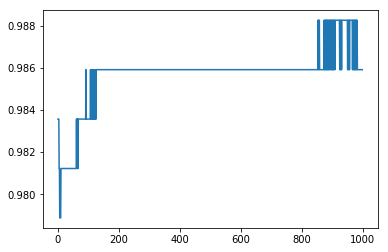

In [66]:
import matplotlib.pyplot as plt
plt.plot(all_accuracies)